In [1]:
# Coloque o nome das acoes e incial das opcoes aqui
papel_acao = 'PETR4'
papel_opcoes = 'PETRF1'

In [2]:
import bovespa
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import re
import logging
import matplotlib. pyplot as plt 

In [3]:
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)
ontem = datetime.today() - timedelta(days=1)
hoje = datetime.today()

data_negociacao = hoje

acao = bovespa.get_values(papel_acao)
opcao = bovespa.get_values(papel_opcoes, exact=False)

In [4]:
aval_opcoes = bovespa.process(acao, opcao, filter_date = data_negociacao)
opcoes_ordenadas_lucro = aval_opcoes.sort_values('lucro %', ascending=False)
display(opcoes_ordenadas_lucro[:10])

,acao,tipo acao,valor acao,opcao,tipo_opcao,data negociacao,valor opcao,strike,volume,lucro %
25,PETR4 PETROBRAS PN N2,PN,17.58,"PETRF175 PETRE PN 17,55",PN,07/05,1.56,17.55,0.0,8.703072
26,PETR4 PETROBRAS PN N2,PN,17.58,"PETRF178 PETR PN 17,80",PN,07/05,1.36,17.80,0.0,7.736064
24,PETR4 PETROBRAS PN N2,PN,17.58,"PETRF173 PETR PN 17,30",PN,07/05,1.62,17.30,83.0,7.622298
28,PETR4 PETROBRAS PN N2,PN,17.58,"PETRF180 PETRE PN 18,05",PN,07/05,1.23,18.05,0.0,6.996587
21,PETR4 PETROBRAS PN N2,PN,17.58,"PETRF168 PETR PN 16,80",PN,07/05,1.91,16.80,0.0,6.427759
30,PETR4 PETROBRAS PN N2,PN,17.58,"PETRF183 PETR PN 18,30",PN,07/05,1.13,18.30,0.0,6.427759
19,PETR4 PETROBRAS PN N2,PN,17.58,"PETRF163 PETR PN 16,30",PN,07/05,2.28,16.30,0.0,5.688282
32,PETR4 PETROBRAS PN N2,PN,17.58,"PETRF188 PETR PN 18,80",PN,07/05,0.94,18.80,0.0,5.346985
16,PETR4 PETROBRAS PN N2,PN,17.58,"PETRF158 PETR PN 15,80",PN,07/05,2.70,15.80,0.0,5.233220
34,PETR4 PETROBRAS PN N2,PN,17.58,"PETRF190 PETRE PN 19,05",PN,07/05,0.84,19.05,4.0,4.778157


INFO:numexpr.utils:NumExpr defaulting to 4 threads.


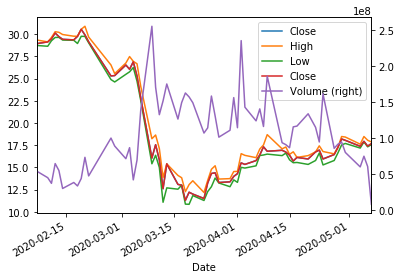

In [5]:
# get stock info
#petro = yf.Ticker('PETR4.SA')

ticker = yf.Ticker( papel_acao + '.SA')
# valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
hist = ticker.history(period='3mo')

ax = plt.gca()
hist.plot(y=['Close', 'High', 'Low', 'Close'], ax=ax)
hist.plot(secondary_y=True, y='Volume', ax=ax)
plt.show()
